# Connect G-Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os
default_dir = "/content/drive/MyDrive/GreatEdu/"
os.chdir(default_dir)

In [5]:
!ls

'09 File Handling.ipynb'
 assets
'churn_modeling_dataset - churn_modeling_dataset.csv'
 Dataframe_I.ipynb
 data_online_retail.xlsx
'Data Science Project 2.ipynb'
 dfTransjakarta2.csv
 dfTransjakarta.csv
'diabetes - diabetes.csv'
 global-data-on-sustainable-energy.csv
 Online_Retail.csv
 Telco-Customer-Churn.csv
'titanic_train - titanic_train.csv'
'titanic_train - titanic_train.gsheet'
'Tugas Mandiri Dataframe I - Mochammad Syahrul Abidin.ipynb'
'Uji BNSP full.ipynb'
'Uji BNSP.ipynb'


# Import Libraries

In [6]:
import warnings
warnings.simplefilter(action="ignore")

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import (
    GradientBoostingClassifier,
    RandomForestClassifier
)

from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    roc_curve,
    classification_report
)

from sklearn.model_selection import (
    KFold,
    train_test_split,
    GridSearchCV,
    cross_val_score
)

import pickle

# 1.&nbsp;Load Dataset

In [7]:
df = pd.read_csv("diabetes - diabetes.csv")

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,627.000,50,1
1,1,85,66,29,0,26.6,351.000,31,0
2,8,183,64,0,0,23.3,672.000,32,1
3,1,89,66,23,94,28.1,167.000,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 1.1 Pima Indians Diabetes Database

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, **all patients here are females at least 21 years old of Pima Indian heritage**.

The datasets consists of several medical predictor variables and one target variable, **Outcome**. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

We build a **machine learning model** to accurately predict whether or not the patients in the dataset have **diabetes or not.**

- **Pregnancies**: Number of times pregnant
- **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- **BloodPressure**: Diastolic blood pressure (mm Hg)
- **SkinThickness**: Triceps skin fold thickness (mm)
- **Insulin**: 2-Hour serum insulin (mu U/ml)
- **BMI**: Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction**: Diabetes pedigree function
- **Age**: Age (years)
- **Outcome**: Class variable (0 or 1) 268 of 768 are 1, the others are 0

## 1.2 General Information on Variables

### a. Glucose Tolerance Test
It is a blood test that involves taking multiple blood samples over time, usually 2 hours.It used to diagnose diabetes. The results can be classified as normal, impaired, or abnormal.
* **Normal Results for Diabetes ->** Two-hour glucose level less than 140 mg/dL

* **Impaired Results for Diabetes ->** Two-hour glucose level 140 to 200 mg/dL

* **Abnormal (Diagnostic) Results for Diabetes ->** Two-hour glucose level greater than 200 mg/dL



### b. BloodPressure
The diastolic reading, or the bottom number, is the pressure in the arteries when the heart rests between beats. This is the time when the heart fills with blood and gets oxygen. A normal diastolic blood pressure is lower than 80. A reading of 90 or higher means you have high blood pressure.

* **Normal**: Systolic below 120 and diastolic below 80
* **Elevated**: Systolic 120–129 and diastolic under 80
* **Hypertension stage 1**: Systolic 130–139 and diastolic 80–89
* **Hypertension stage 2**: Systolic 140-plus and diastolic 90 or more
* **Hypertensive crisis**: Systolic higher than 180 and diastolic above 120.

### c. BMI

The standard weight status categories associated with BMI ranges for adults are shown in the following table.

* Below 18.5 -> **Underweight**
* 18.5 – 24.9 -> **Normal or Healthy Weight**
* 25.0 – 29.9 -> **Overweight**
* 30.0 and Above -> **Obese**

### d. Triceps Skinfolds
For adults, the standard normal values for triceps skinfolds are:
* 18.0mm (women)

# 2.&nbsp;Exploratory Data Analysis

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,627.000,50,1
1,1,85,66,29,0,26.6,351.000,31,0
2,8,183,64,0,0,23.3,672.000,32,1
3,1,89,66,23,94,28.1,167.000,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,171.00,63,0
764,2,122,70,27,0,36.8,0.34,27,0
765,5,121,72,23,112,26.2,245.00,30,0
766,1,126,60,0,0,30.1,349.00,47,1
767,1,93,70,31,0,30.4,315.00,23,0


In [11]:
df.shape

(768, 9)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
# Getting various summary statistics
# There is notably a large difference between 99% and max values of predictors
# “Insulin”, ”SkinThickness”, ”DiabetesPedigreeFunction”
# There are extreme values-Outliers in our data set

# See BMI Min: 0
df.describe(
    percentiles=[0.05, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]
).T

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.0,0.00,1.0,3.0,6.00,9.0,10.000,13.000,17.0
Glucose,768.0,120.894531,31.972618,0.0,79.00,99.0,117.0,140.25,167.0,181.000,196.000,199.0
BloodPressure,768.0,69.105469,19.355807,0.0,38.70,62.0,72.0,80.00,88.0,90.000,106.000,122.0
SkinThickness,768.0,20.536458,15.952218,0.0,0.00,0.0,23.0,32.00,40.0,44.000,51.330,99.0
Insulin,768.0,79.799479,115.244002,0.0,0.00,0.0,30.5,127.25,210.0,293.000,519.900,846.0
BMI,768.0,31.992578,7.884160,0.0,21.80,27.3,32.0,36.60,41.5,44.395,50.759,67.1
DiabetesPedigreeFunction,768.0,347.079349,254.431659,0.1,0.34,165.0,295.5,527.25,722.9,827.300,950.980,997.0
Age,768.0,33.240885,11.760232,21.0,21.00,24.0,29.0,41.00,51.0,58.000,67.000,81.0
Outcome,768.0,0.348958,0.476951,0.0,0.00,0.0,0.0,1.00,1.0,1.000,1.000,1.0


In [14]:
# Target Variable: Categorical
df['Outcome'].unique()

array([1, 0])

In [15]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [16]:
df['Outcome'].value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

# 3.&nbsp;Data Visualization

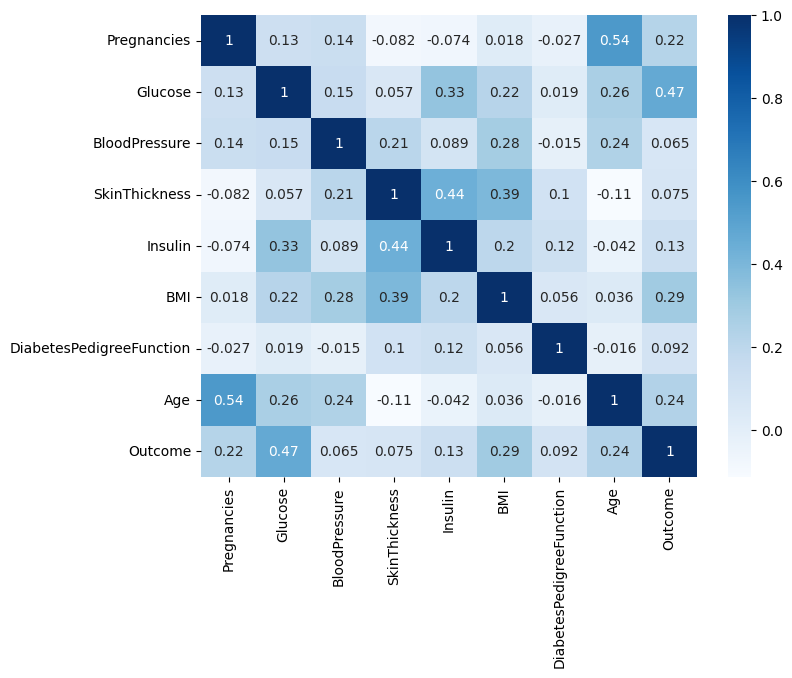

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    df.corr(),
    cmap='Blues',
    annot=True
);

In [18]:
df.nlargest(10, 'BloodPressure')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
106,1,96,122,0,0,22.4,207.00,27,0
691,13,158,114,0,0,42.3,257.00,44,1
43,9,171,110,24,240,45.4,721.00,54,1
177,0,129,110,46,130,67.1,319.00,26,1
549,4,189,110,31,0,28.5,0.68,37,0
84,5,137,108,0,0,48.8,227.00,37,1
362,5,103,108,37,0,39.2,305.00,65,0
658,11,127,106,0,0,39.0,0.19,51,0
662,8,167,106,46,231,37.6,165.00,43,1
672,10,68,106,23,49,35.5,285.00,47,0


In [19]:
# df.corr()

In [20]:
k = 10
k_largest_corr = df.corr().nlargest(k, 'Outcome')
k_largest_feats = k_largest_corr['Outcome'].index
list(k_largest_feats)

['Outcome',
 'Glucose',
 'BMI',
 'Age',
 'Pregnancies',
 'Insulin',
 'DiabetesPedigreeFunction',
 'SkinThickness',
 'BloodPressure']

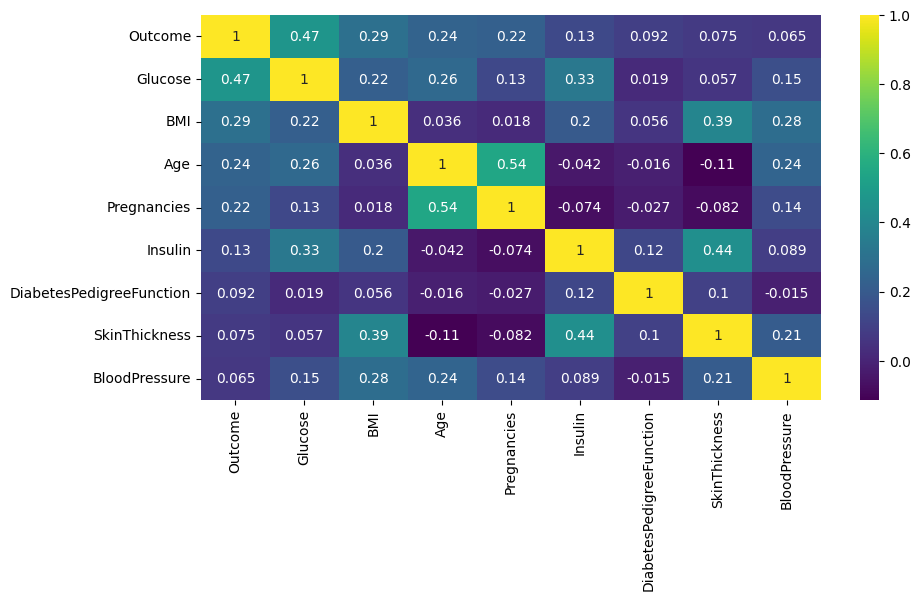

In [21]:
# Outcome correlation matrix

k = 9 # number of variables for heatmap
cols = df.corr().nlargest(k, 'Outcome')['Outcome'].index
corr_mat = df[cols].corr()

# Visualize
plt.figure(figsize=(10, 5))
sns.heatmap(
    corr_mat, cmap='viridis', annot=True,
);

In [22]:
# df.loc[df.Pregnancies==12]

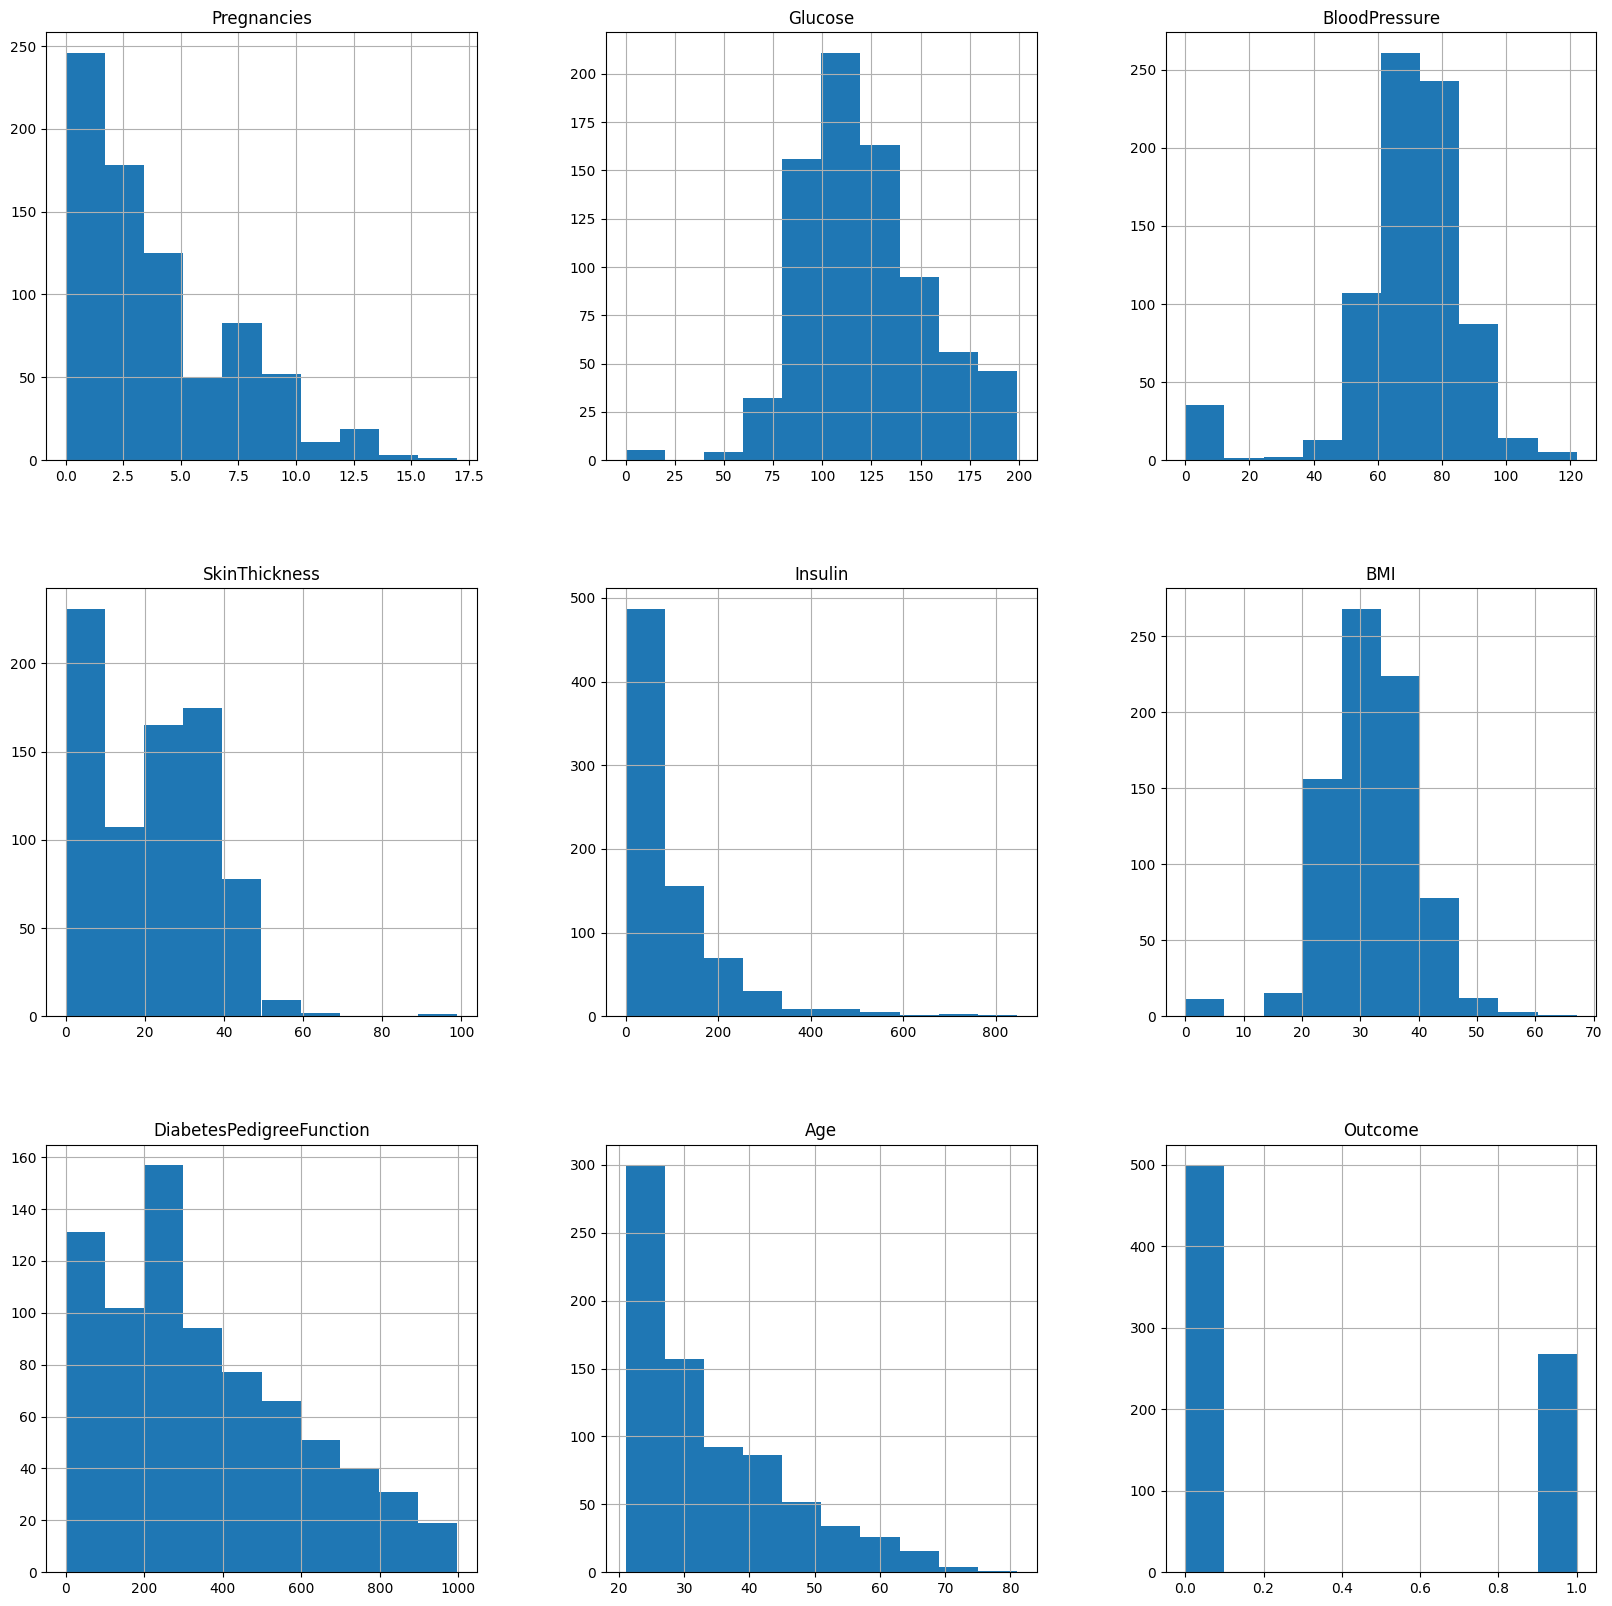

In [23]:
# see how the data is distributed.
df.hist(figsize=(20,20));

In [24]:
df['Age'].mean(), df['Age'].median()

(33.240885416666664, 29.0)

In [ ]:
for col in df.columns:
    if col != "Outcome":
        sns.catplot(
            data=df, x="Outcome",
            y=col, hue="Outcome")
        plt.grid()

# 4.&nbsp;Data Preprocessing

In [ ]:
# Observation units for variables with a minimum value of zero are NaN,
# except for the pregnancy variable.
df.describe(
    percentiles=[0.05, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]
).T

## Handling Missing Values: Imputation

In [ ]:
# NaN values of 0 for Glucose, Blood Pressure, Skin Thickness, Insulin, BMI
# We can write Nan instead of 0

cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols:
    df[col].replace(0, np.NaN, inplace=True)

In [ ]:
# now we can see missing values
df.isnull().sum()

In [ ]:
df["Outcome"] == 0

In [ ]:
# We can fill in NaN values with a median
# according to the target value

cols = [
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI"
]

mask_label_zero = (df["Outcome"] == 0)
mask_label_one = (df["Outcome"] == 1)

for col in cols:

    mask_col_null = df[col].isnull()
    col_median_zero = df[mask_label_zero][col].median()
    col_median_one = df[mask_label_one][col].median()

    df.loc[(mask_label_zero & mask_col_null), col] = col_median_zero
    df.loc[(mask_label_one & mask_col_null), col] = col_median_one

In [ ]:
df.isnull().sum()

In [ ]:
# df[(df['Pregnancies'] == 1)].any(axis=0)
# df[(df['Pregnancies'] == 1)].any(axis=None)
# (df['Pregnancies'] == 1).all(axis=None)

## Outlier Handling

In [ ]:
def outlier_thresholds(
        df, feature,
        quantile_lower=0.25,
        quantile_upper=0.75):

    Q1 = df[feature].quantile(quantile_lower)
    Q3 = df[feature].quantile(quantile_upper)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    return lower_limit, upper_limit

In [ ]:
def has_outliers(
        df, feature,
        quantile_lower=0.25,
        quantile_upper=0.75):
    """
    Args:
        df (pd.DataFrame): DataFrame containing feature
        feature (str): feature name to be checked

    Return:
        bool: Is outlier(s) exist in given feature in the DataFrame
    """
    low_lim, up_lim = outlier_thresholds(
        df, feature, quantile_lower, quantile_upper)
    exist_lower_outliers = (df[feature] < low_lim).any(axis=None)
    exist_upper_outliers = (df[feature] > up_lim).any(axis=None)

    return (exist_lower_outliers or exist_upper_outliers)

In [ ]:
for feat in df.columns:
    exist_outliers = has_outliers(
        df, feat, quantile_lower=0.1, quantile_upper=0.9)
    if exist_outliers:
        print(f"Outliers exist in {feat}!")

In [ ]:
feats_with_outliers = []

for feat in df.columns:
    exist_outliers = has_outliers(
        df, feat, quantile_lower=0.1, quantile_upper=0.9)
    if exist_outliers:
        feats_with_outliers.append(feat)

In [ ]:
feats_with_outliers

In [ ]:
def replace_with_thresholds(df, numerical_feats):
    for feat in numerical_feats:
        low_limit, up_limit = outlier_thresholds(df, feat)

        mask_lower = (df[feat] < low_limit)
        mask_upper = (df[feat] > up_limit)

        df.loc[mask_lower, feat] = low_limit
        df.loc[mask_upper, feat] = up_limit

In [ ]:
replace_with_thresholds(df,feats_with_outliers)

In [ ]:
df.describe(
    percentiles=[0.05, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

# 5.&nbsp;Feature Engineering

See 1.1 & 1.2

## Feature Categorization

In [ ]:
max(df['Glucose'])

In [ ]:
df['New_Glucose_Class'] = pd.cut(
    x=df['Glucose'],
    bins=[0, 139, 200],
    labels=["Normal", "Pre-Diabetes"]
)

In [ ]:
df['New_Glucose_Class'].value_counts(normalize=True)

In [ ]:
df['New_BMI_Range'] = pd.cut(
    x=df['BMI'],
    bins=[0, 18.5, 24.9, 29.9, 100],
    labels=["Underweight", "Healthy", "Overweight", "Obese"]
)

df['New_BMI_Range'].value_counts(normalize=True)

In [ ]:
df['New_BloodPressure'] = pd.cut(
    x=df['BloodPressure'],
    bins=[0, 79, 89, 123],
    labels=["Normal", "HS1", "HS2"]
)

df['New_BloodPressure'].value_counts(normalize=True)

In [ ]:
df['New_SkinThickness'] = (
    df['SkinThickness']
    .apply(lambda x: 1 if x <= 18.0 else 0)
)

In [ ]:
df.head()

## One-Hot Encoding

In [ ]:
def one_hot_encoder(
        df, categorical_feats,
        nan_as_category=False):

    original_columns = list(df.columns)

    df = pd.get_dummies(
        df,
        columns=categorical_feats,
        dummy_na=nan_as_category,
        drop_first=True
    )

    new_columns = [col for col in df.columns if col not in original_columns]
    return df, new_columns

In [ ]:
categorical_feats = [feat for feat in df.columns if len(df[feat].unique()) <= 10 and feat != "Outcome"]
categorical_feats

In [ ]:
df, new_cols_ohe = one_hot_encoder(df, categorical_feats)
new_cols_ohe

In [ ]:
df.head()

## Feature Scaling

In [ ]:
like_num = [col for col in df.columns if df[col].dtypes != 'O' and len(df[col].value_counts()) < 10]
no_need_to_scaled = new_cols_ohe + ["Outcome"] + like_num
cols_need_scale = [col for col in df.columns if col not in no_need_to_scaled]

print("List of columns that need to be scaled:\n", cols_need_scale)
rs = RobustScaler()
df.loc[:, cols_need_scale] = rs.fit_transform(df[cols_need_scale])
print("Feature Scaling, Done!")

In [ ]:
like_num

In [ ]:
df.head()

In [ ]:
df.info()

# 6.&nbsp;Modeling

## Notes: Metric Evaluation

See [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

The choice between micro-average, macro-average, or weighted-average in the classification_report from scikit-learn depends on your specific use case and the characteristics of your data. Each average type provides a different perspective on the overall model performance.

Here's a brief explanation of each average type:

1. **Micro-average:**

    Calculates metrics globally by considering all instances together.

    Suitable when classes are imbalanced, and you want to treat all instances equally.
    Gives equal weight to each data point, regardless of class.

2. **Macro-average:**

    Calculates metrics for each class independently and then takes the unweighted average.

    Suitable when you want to evaluate the overall performance across all classes without considering class imbalances.
    Gives equal weight to each class, regardless of the number of instances in each class.

3. **Weighted-average:**

    Calculates metrics for each class independently and then takes the average, weighted by the number of true instances for each class.

    Suitable when classes are imbalanced, and you want to give more importance to the performance on larger classes.
    Provides a balanced view of the overall performance by accounting for class imbalances.

In summary:

- Use micro-average when you want to treat all instances equally, especially in the presence of class imbalances.

- Use macro-average when you want to evaluate the overall performance without considering class imbalances.

- Use weighted-average when you want to account for class imbalances and give more importance to the larger classes.


It's essential to choose the appropriate average based on the goals of your analysis and the nature of your data.

In some cases, you may need to consider multiple metrics and averages to get a comprehensive understanding of your model's performance.

In [ ]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.1,    # 10% for testing
    stratify=y,       # Stratified sampling based on labels
    random_state=42   # Random seed for reproducibility
)

In [ ]:
print("y train:", y_train.value_counts(normalize=True))
print("\n")
print("y test:", y_test.value_counts(normalize=True))

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score,
    recall_score, f1_score
)

In [ ]:
models = [
    ('LR', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('RF', RandomForestClassifier()),
    ('SVC', SVC(gamma='auto')),
    ('XGBM', XGBClassifier()),
    ('GB', GradientBoostingClassifier()),
    ('LightGB', LGBMClassifier())
]

# Evaluate each model in turn
scorings = [
    'accuracy', 'f1_macro',
    'precision_macro', 'recall_macro'
]

model_perf = {}

# For each model
for name, model in models:

    results = {}

    # for each scorings
    for scoring in scorings:
        score_mean = []
        score_std = []

        # Define K-Fold
        kfold = KFold(
            n_splits=10, shuffle=True,
            random_state=42)

        # Training with cross validation
        cv_results = cross_val_score(
            model, X_train, y_train,
            cv=kfold, scoring=scoring)

        # Save Training Result
        results[scoring] = {
            'train_mean': cv_results.mean(),
            'train_std': cv_results.std()
        }

    model_perf[name] = results

In [ ]:
model_perf

In [ ]:
focus_metric = 'recall_macro'
perf_data = {
    "model_type": [],
    f"train_avg_{focus_metric}": [],
    f"train_stddev_{focus_metric}": []
}

for model_name, perf in model_perf.items():
    mean = perf[focus_metric]['train_mean']
    std = perf[focus_metric]['train_std']
    perf_data["model_type"].append(model_name)
    perf_data[f"train_avg_{focus_metric}"].append(mean)
    perf_data[f"train_stddev_{focus_metric}"].append(std)

eval_result = pd.DataFrame(perf_data)
eval_result

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = model.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='macro')
recall_test = recall_score(y_test, y_pred_test, average='macro')
f1_test = f1_score(y_test, y_pred_test, average='macro')

# Print or use the test set scores as needed
print(f"Test Set Accuracy: {accuracy_test:.4f}")
print(f"Test Set Precision: {precision_test:.4f}")
print(f"Test Set Recall: {recall_test:.4f}")
print(f"Test Set F1 Score: {f1_test:.4f}")

## 6.1 Model Hyper-Parameter Tuning

In [ ]:
# Let's choose the highest 4 models
# GBM
gbm_model = GradientBoostingClassifier()

# Model Tuning
gbm_params = {
    "learning_rate": [0.001, 0.01, 0.1],
    "max_depth": [3, 5, 8],
    "n_estimators": [200, 500, 1000],
    "subsample": [1, 0.5, 0.8]
}

gbm_cv_model = GridSearchCV(
    gbm_model,
    gbm_params,
    cv=3,
    n_jobs=-1,
    verbose=2).fit(X, y)

print(gbm_cv_model.best_params_)

# Final Model
gbm_tuned = GradientBoostingClassifier(**gbm_cv_model.best_params_).fit(X_train, y_train)

In [ ]:
# LightGBM:
lgb_model = LGBMClassifier()

# Model Tuning
lgbm_params = {
    "learning_rate": [0.01, 0.5, 1],
    "n_estimators": [200, 500, 1000],
    "max_depth": [6, 8, 10],
    "colsample_bytree": [1, 0.4, 0.5]
}

lgbm_cv_model = GridSearchCV(
    lgb_model,
    lgbm_params,
    cv=3,
    n_jobs=-1,
    verbose=2).fit(X, y)

print(lgbm_cv_model.best_params_)

# Final Model
lgbm_tuned = LGBMClassifier(**lgbm_cv_model.best_params_).fit(X_train, y_train)

In [ ]:
# Random Forests:
rf_model = RandomForestClassifier()

# Model Tuning
rf_params = {
    "n_estimators" :[200, 500, 1000],
    "max_features": [3, 5, 7],
    "min_samples_split": [2, 5, 10],
    "max_depth": [5, 8, None]
}

rf_cv_model = GridSearchCV(
    rf_model,
    rf_params,
    cv=3,
    n_jobs=-1,
    verbose=2).fit(X_train, y_train)

print(rf_cv_model.best_params_)

# Final Model
rf_tuned = RandomForestClassifier(**rf_cv_model.best_params_).fit(X, y)

In [ ]:
# XGB
xgb_model = XGBClassifier()

# Model Tuning
xgb_params = {
    "learning_rate": [0.01, 0.1, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 10),
    "max_depth":[3, 5, 8],
    "subsample":[0.5, 0.9, 1.0],
    "n_estimators": [100, 1000]
}

xgb_cv_model = GridSearchCV(
    xgb_model,
    xgb_params,
    cv=3,
    n_jobs=-1,
    verbose=2).fit(X_train, y_train)

print(xgb_cv_model.best_params_)

xgb_tuned = XGBClassifier(**xgb_cv_model.best_params_).fit(X, y)

In [ ]:
# evaluate each model in turn
models = [
    ('RF', rf_tuned),
    ('GBM', gbm_tuned),
    ("LightGBM", lgbm_tuned),
    ("XGB", xgb_tuned),
    #...,
    #...,
]

# Evaluate each model in turn
scorings = [
    'accuracy', 'f1_macro',
    'precision_macro', 'recall_macro'
]

model_training_perf = {}

# For each model
for name, model in models:

    results = {}

    # for each scorings
    for scoring in scorings:
        score_mean = []
        score_std = []

        # Define K-Fold
        kfold = KFold(
            n_splits=5, shuffle=True,
            random_state=42)

        # Training with cross validation
        cv_results = cross_val_score(
            model, X_test, y_test,
            cv=kfold, scoring=scoring)

        # Save Training Result
        results[scoring] = {
            'train_mean': cv_results.mean(),
            'train_std': cv_results.std()
        }

    model_training_perf[name] = results

## 6.2 Model Training Evaluation

In [ ]:
import pickle
import os
os.makedirs("models")

# Define the list of models with their names
models = [
    ('RF', rf_tuned),
    ('GBM', gbm_tuned),
    ("LightGBM", lgbm_tuned),
    ("XGB", xgb_tuned),
]

# Iterate over each model in the list
for model_name, model in models:
    # Specify the file path where you want to save the model
    file_path = f"models/{model_name}_model.pkl"

    # Open the file in binary write mode
    with open(file_path, 'wb') as file:
        # Use pickle.dump() to serialize and save the model to the file
        pickle.dump(model, file)

In [ ]:
# model_training_perf

In [ ]:
file_path = "model_training_perf.pkl"
with open(file_path, 'wb') as file:
    pickle.dump(model_training_perf, file)

In [ ]:
model_training_perf_df = pd.concat(
    {
        k: pd.DataFrame.from_dict(v, 'index') for k, v in model_training_perf.items()
    },
    axis=0
)

model_training_perf_df.index.rename(
    ['model_name', 'eval_metric'],
    inplace=True
)

model_training_perf_df

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

In [ ]:
train_viz_data = (
    model_training_perf_df
    .loc[(slice(None), slice(None)), :].
    train_mean
    .reset_index()
)

train_viz_data

In [ ]:
# fig, ax = plt.subplots()
g=sns.catplot(
    data=train_viz_data,
    kind="bar",
    x="model_name",
    y="train_mean",
    hue="eval_metric",
    palette="dark",
    alpha=.6,
    height=6
);

# Set axis labels
g.set_axis_labels("", "mean_score")

# Set legend title
g.legend.set_title("Metric")

# Set figure title
g.fig.suptitle("Model Evaluation On Train Data\n")

# Set y-ticks with a scale of 0.05
g.ax.set_yticks([i * 0.05 for i in range(int(g.ax.get_ylim()[1] / 0.05) + 1)])

# Show the plot
plt.show()

## 6.3 Model Selection
Evaluation on Test Data

In [ ]:
import pickle

# Define a list to store the loaded models
loaded_models = []

# Define the list of model names
model_names = ['RF', 'GBM', 'LightGBM', 'XGB']

# Iterate over each model name
for model_name in model_names:
    # Specify the file path of the corresponding .pkl file
    file_path = f"models/{model_name}_model.pkl"

    # Open the file in binary read mode
    with open(file_path, 'rb') as file:
        # Use pickle.load() to deserialize and load the model from the file
        loaded_model = pickle.load(file)

        # Append the loaded model to the list of loaded models
        loaded_models.append((model_name, loaded_model))

In [ ]:
from sklearn.metrics import (
    accuracy_score, f1_score,
    precision_score, recall_score
)

# Define lists to store the evaluation metrics for each model
accuracies = []
f1_scores = []
precisions = []
recalls = []

# Iterate over each loaded model
for model_name, loaded_model in loaded_models:
    # Predict using the loaded model on the test data
    y_pred = loaded_model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Append the metrics to the respective lists
    accuracies.append((model_name, accuracy))
    f1_scores.append((model_name, f1))
    precisions.append((model_name, precision))
    recalls.append((model_name, recall))

evaluation_results = pd.DataFrame({
    'Model': [model_name for model_name, _ in loaded_models],
    'Accuracy': [accuracy for _, accuracy in accuracies],
    'F1 Score': [f1 for _, f1 in f1_scores],
    'Precision': [precision for _, precision in precisions],
    'Recall': [recall for _, recall in recalls],
})

# Print the DataFrame
evaluation_results

In [ ]:
# Melt the evaluation_results DataFrame
melted_evaluation_results = pd.melt(
    evaluation_results,
    id_vars=['Model'],
    value_vars=[
        'Accuracy', 'F1 Score',
        'Precision', 'Recall'
    ],
    var_name='Metric',
    value_name='Value'
)

# Print the melted DataFrame
melted_evaluation_results

In [ ]:
# fig, ax = plt.subplots()
g=sns.catplot(
    data=melted_evaluation_results,
    kind="bar",
    x="Model",
    y="Value",
    hue="Metric",
    palette="dark",
    alpha=.6,
    height=6
);

# Set axis labels
g.set_axis_labels("", "score")

# Set legend title
g.legend.set_title("Metric")

# Set figure title
g.fig.suptitle("Model Evaluation On Test Data")

# Set y-ticks with a scale of 0.05
g.ax.set_yticks([i * 0.05 for i in range(int(g.ax.get_ylim()[1] / 0.05) + 1)])

# Show the plot
plt.show()

Best Model:

model_name =>	Recall = value

# 7.&nbsp;Storytelling:
Deskripsikan (Ringkas Semua) semua proses dari bagian 1 sampai 6





1. ...
2. ...
3. ...
4. ...
5. ...
6. ...

# 8.&nbsp;Conclusion (Minimal 3):
1. ...
2. ...
3. ...